## Photon and Electron classification for barrel region (EB) with and without tracking information 

In [1]:
import uproot
import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Input, Activation, Dense, Convolution2D, MaxPooling2D, Dropout, Flatten
from tensorflow import keras
from tensorflow.keras.callbacks import ReduceLROnPlateau



### Reading the root file with uprood and coverting them to pandas data frame

In [2]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

treename = 'fTree' # this is the name of the tree in the root file
filename = {}
upfile = {}
df = {}


filename['photon'] = 'data/Signal.root' # this the the file which contains photons (diphotons)
filename['electron'] = 'data/Background.root' # this is the file which contains electrons and positron.

branches1 = ['Photon1']


upfile['photon1'] = uproot.open(filename['photon'])
upfile['electron1'] = uproot.open(filename['electron'])
df['photon1'] = upfile['photon1'][treename].arrays(branches1, library='pd')
df['electron1'] = upfile['electron1'][treename].arrays(branches1, library='pd')
df['photon1']['isPhoton'] = np.ones(len(df['photon1']))
df['electron1']['isPhoton'] = np.zeros(len(df['electron1']))

branches2 = ['Photon2']


upfile['photon2'] = uproot.open(filename['photon'])
upfile['electron2'] = uproot.open(filename['electron'])
df['photon2'] = upfile['photon2'][treename].arrays(branches2, library='pd')
df['electron2'] = upfile['electron2'][treename].arrays(branches2, library='pd')
df['photon2']['isPhoton'] = np.ones(len(df['photon2']))
df['electron2']['isPhoton'] = np.zeros(len(df['electron2']))


            
                    

####  Selecting Photon and electron which passes certain condition and creating separate data frame for them, this data frame is not used for training purpose. This is only for analysis of data 

In [3]:
df['electron1_pashipt'] = df['electron1'][(df['electron1'][('Photon1','pt')] >= 30.0) 
    & (df['electron1'][('Photon1','pt')] <= 1800)
    & (df['electron1'][('Photon1','isEB')] ==1) & (df['electron1'][('Photon1','passHighPtID')] == 1)]
# len(df['electron1_pashipt'])

df['photon1_pashipt'] = df['photon1'][(df['photon1'][('Photon1','pt')] >= 30.0) & 
                              (df['photon1'][('Photon1','pt')] <= 1800)
     & (df['photon1'][('Photon1','isEB')] ==1) & (df['photon1'][('Photon1','passHighPtID')] ==1)]
# len(df['photon1_pashipt'])

df['electron2_pashipt'] = df['electron2'][(df['electron2'][('Photon2','pt')] >= 30.0) & (df['electron2'][('Photon2','pt')] <= 1800)
     & (df['electron2'][('Photon2','isEB')] ==1) & (df['electron2'][('Photon2','passHighPtID')] ==1)]
# len(df['electron2_pashipt'])

df['electron2_pashipt'] = df['electron2'][(df['electron2'][('Photon2','pt')] >= 30.0) & 
                                  (df['electron2'][('Photon2','pt')] <= 1800)
     & (df['electron2'][('Photon2','isEB')] ==1) & (df['electron2'][('Photon2','passHighPtID')] ==1)]
# len(df['electron2_pashipt'])

## Selecting the particles with high transeve momentum in EB region 

In [4]:
df['electron1'] = df['electron1'][(df['electron1'][('Photon1','pt')] >= 30.0) & 
                (df['electron1'][('Photon1','pt')] <= 1800) & (df['electron1'][('Photon1','isEB')] ==1)]

df['photon1'] = df['photon1'][(df['photon1'][('Photon1','pt')] >= 30.0) & 
                (df['photon1'][('Photon1','pt')] <= 1800) & (df['photon1'][('Photon1','isEB')] ==1)]

df['electron2'] = df['electron2'][(df['electron2'][('Photon2','pt')] >= 30.0) &
                (df['electron2'][('Photon2','pt')] <= 1800) & (df['electron2'][('Photon2','isEB')] ==1)]


df['photon2'] = df['photon2'][(df['photon2'][('Photon2','pt')] >= 30.0) &
                (df['photon2'][('Photon2','pt')] <= 1800) & (df['photon2'][('Photon2','isEB')] ==1)]


In [5]:
# df["photon2"]['isPhoton']

In [6]:
# df['electron1'].isnull().sum().sum()

### Lets plot few parameters

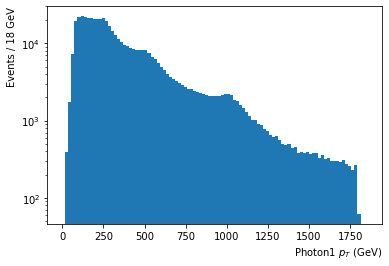

In [7]:

n_bins_pt = 100;
df['photon1'][('Photon1','pt')].plot.hist(bins=n_bins_pt,range=(0,1850),log=1); 
plt.xlabel('Photon1 $p_T$ (GeV)', horizontalalignment='right', x=1.0);
plt.ylabel('Events / '+str(int(1850/n_bins_pt))+' GeV', horizontalalignment='right', y=1.0);

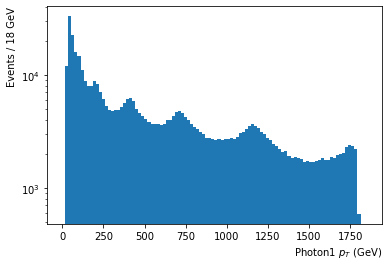

In [8]:
n_bins_pt = 100;
df['electron1'][('Photon1','pt')].plot.hist(bins=n_bins_pt,range=(0,1850),log=1); 
plt.xlabel('Photon1 $p_T$ (GeV)', horizontalalignment='right', x=1.0);
plt.ylabel('Events / '+str(int(1850/n_bins_pt))+' GeV', horizontalalignment='right', y=1.0);

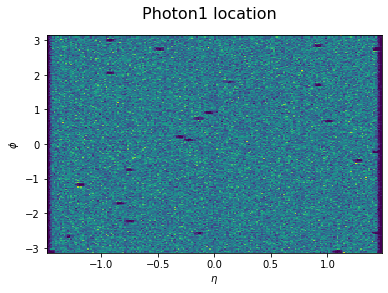

In [9]:

plt.hist2d(df['photon1'][('Photon1','eta')],df['photon1'][('Photon1','phi')],bins=200); 
plt.suptitle('Photon1 location',fontsize=16)
plt.xlabel('$\eta$');
plt.ylabel('$\phi$');

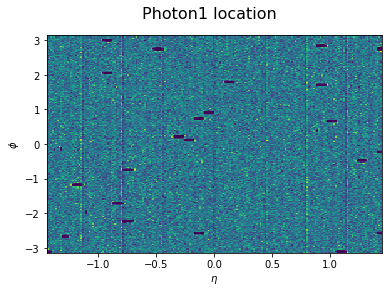

In [10]:
plt.hist2d(df['photon1'][('Photon1','scEta')],df['photon1'][('Photon1','scPhi')],bins=200); 
plt.suptitle('Photon1 location',fontsize=16)
plt.xlabel('$\eta$');
plt.ylabel('$\phi$');

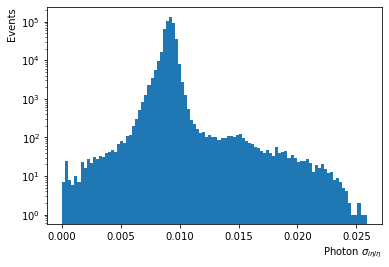

In [11]:
df['photon1'][('Photon1','sigmaIetaIeta5x5')].plot.hist(bins=100,log=1); 
plt.xlabel('Photon $\sigma_{i\eta i\eta}$', horizontalalignment='right', x=1.0);
plt.ylabel('Events', horizontalalignment='right', y=1.0);

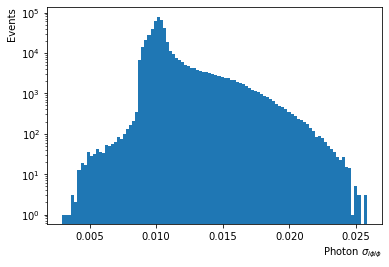

In [12]:
df['photon1'][('Photon1','sigmaIphiIphi5x5')].plot.hist(bins=100,log=1); 
plt.xlabel('Photon $\sigma_{i\phi i\phi}$', horizontalalignment='right', x=1.0);
plt.ylabel('Events', horizontalalignment='right', y=1.0);

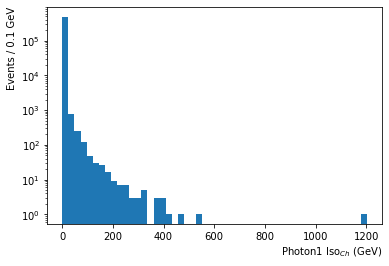

In [13]:
df['photon1'][('Photon1','chargedHadIso03')].plot.hist(bins=50,log=True); 
plt.xlabel('Photon1 Iso$_{Ch}$ (GeV)', horizontalalignment='right', x=1.0);
plt.ylabel('Events / '+str(5/50)+' GeV', horizontalalignment='right', y=1.0);

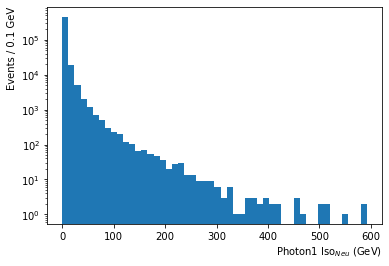

In [14]:
df['photon1'][('Photon1','neutralHadIso03')].plot.hist(bins=50,log=True); 
plt.xlabel('Photon1 Iso$_{Neu}$ (GeV)', horizontalalignment='right', x=1.0);
plt.ylabel('Events / '+str(5/50)+' GeV', horizontalalignment='right', y=1.0);

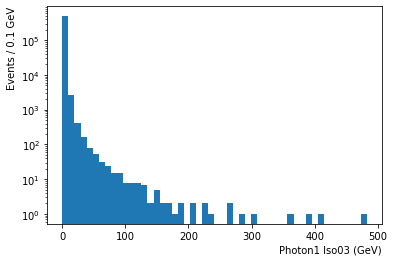

In [15]:
df['photon1'][('Photon1','photonIso03')].plot.hist(bins=50,log=True); 
plt.xlabel('Photon1 Iso03 (GeV)', horizontalalignment='right', x=1.0);
plt.ylabel('Events / '+str(5/50)+' GeV', horizontalalignment='right', y=1.0);

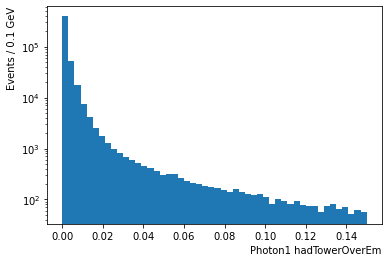

In [16]:
df['photon1'][('Photon1','hadTowerOverEm')].plot.hist(bins=50,log=True); 
plt.xlabel('Photon1 hadTowerOverEm', horizontalalignment='right', x=1.0);
plt.ylabel('Events / '+str(5/50)+' GeV', horizontalalignment='right', y=1.0);

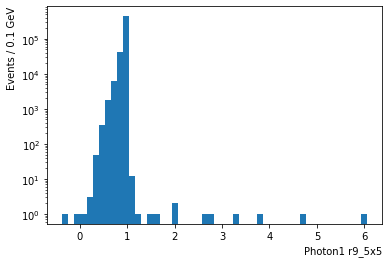

In [17]:
df['photon1'][('Photon1','r9_5x5')].plot.hist(bins=50,log=True); 
plt.xlabel('Photon1 r9_5x5', horizontalalignment='right', x=1.0);
plt.ylabel('Events / '+str(5/50)+' GeV', horizontalalignment='right', y=1.0);

### Few plot for efficiency calculation does not related to this project

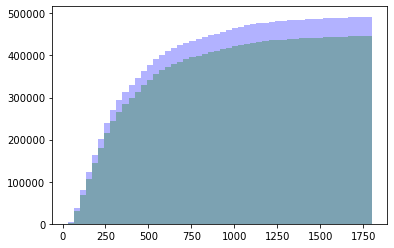

In [18]:
n1,bins1,patches1 = plt.hist(df['photon1'][('Photon1','pt')],bins=50,alpha=0.3,color='blue',cumulative=1,density=0)
n2,bins1,patches1 = plt.hist(df['photon1_pashipt'][('Photon1','pt')],bins=50,alpha=0.3,color='green',cumulative=1,density=0)


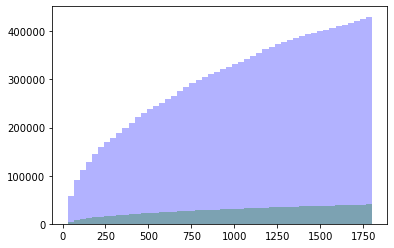

In [19]:
n3,bins2,patches1 = plt.hist(df['electron1'][('Photon1','pt')],bins=50,alpha=0.3,color='blue',cumulative=1,density=False)
n4,bins2,patches1 = plt.hist(df['electron1_pashipt'][('Photon1','pt')],bins=50,alpha=0.3,color='green',cumulative=1,density=False)

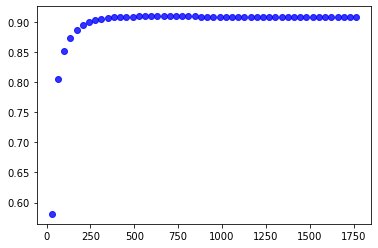

In [20]:
plt.scatter(bins1[:-1],n2/n1,alpha=0.8,color='blue')

## Now lets check corelation between the parameters we are going to use in as input for our DNN

In [21]:
features1 = [('Photon1','pt'),('Photon1','eta'),('Photon1','phi'),('Photon1','rho'),('Photon1','chargedHadIso03'),('Photon1','neutralHadIso03'),('Photon1','photonIso03'),('Photon1','hadTowerOverEm'),('Photon1','r9_5x5'),('Photon1','sigmaIetaIeta5x5'),('Photon1','sigmaIphiIphi5x5'),('Photon1','sigmaIetaIphi5x5'),('Photon1','maxEnergyXtal'),('Photon1','track')]
features2 = [('Photon2','pt'),('Photon2','eta'),('Photon2','phi'),('Photon2','rho'),('Photon2','chargedHadIso03'),('Photon2','neutralHadIso03'),('Photon2','photonIso03'),('Photon2','hadTowerOverEm'),('Photon2','r9_5x5'),('Photon2','sigmaIetaIeta5x5'),('Photon2','sigmaIphiIphi5x5'),('Photon2','sigmaIetaIphi5x5'),('Photon2','maxEnergyXtal'),('Photon2','track')]
features = [('Photon1','pt'),('Photon1','eta'),('Photon1','phi'),('Photon1','rho'),('Photon1','chargedHadIso03'),('Photon1','neutralHadIso03'),('Photon1','photonIso03'),('Photon1','hadTowerOverEm'),('Photon1','r9_5x5'),('Photon1','sigmaIetaIeta5x5'),('Photon1','sigmaIphiIphi5x5'),('Photon1','sigmaIetaIphi5x5'),('Photon1','maxEnergyXtal')]

In [22]:
df['photon1'][('Photon1','iEta')].value_counts()

0.0    491900
Name: (Photon1, iEta), dtype: int64

In [23]:
corr = df['photon1'][features].corr()

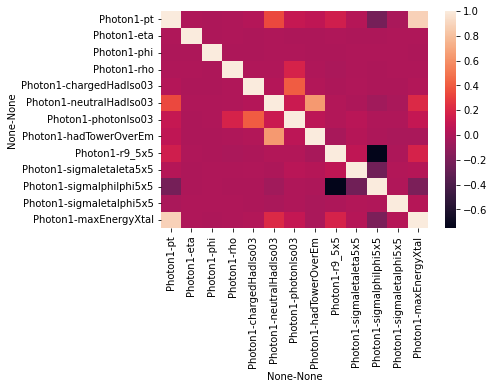

In [24]:
sns.heatmap(corr);

### Adding new coulmn to extending data frame as "track" whose value is 0 if particle passes to CSEV (passElectronVeto) else 1. 

In [25]:
def is_track1(row):
    if (row[('Photon1','passElectronVeto')] == 1):
        val = 0
    else:
        val = 1
    return val

def is_track2(row):
    if (row[('Photon2','passElectronVeto')] == 1):
        val = 0
    else:
        val = 1
    return val
df['photon1'][('Photon1','track')] = df['photon1'].apply(is_track1, axis=1)
df['electron1'][('Photon1','track')] = df['electron1'].apply(is_track1, axis=1)
df['photon2'][('Photon2','track')] = df['photon2'].apply(is_track2, axis=1)
df['electron2'][('Photon2','track')] = df['electron2'].apply(is_track2, axis=1)

In [26]:
# df['electron2'][('Photon2','track')].value_counts()

In [27]:
# df['photon2'][('Photon2','track')].value_counts()

In [28]:
df_all1 = pd.concat([df['photon1'], df['electron1']])
df_all2 = pd.concat([df['photon2'], df['electron2']])

In [29]:
# df_all1[('Photon1','passElectronVeto')]

In [30]:
# df_all1

In [31]:
X1 = df_all1[features1].values
Y1 = df_all1['isPhoton']
X2 = df_all2[features2].values
Y2 = df_all2['isPhoton']
X_track=np.concatenate((X1, X2), axis=0)
Y=np.concatenate((Y1, Y2), axis=0)

In [32]:

from sklearn.model_selection import train_test_split
X_track_train_val, X_track_test, Y_train_val, Y_test = train_test_split(X_track, Y, test_size=0.20, random_state=7)

from sklearn.preprocessing import StandardScaler
scaler_track = StandardScaler().fit(X_track_train_val)
X_track_train_val = scaler_track.transform(X_track_train_val)
X_track_test = scaler_track.transform(X_track_test)





In [33]:
print ("Number of total examples: " + str(X_track.shape[0]))
print ("Number of training examples: " + str(X_track_train_val.shape[0]))
print ("Number of testing examples: " + str(X_track_test.shape[0]))
print ("X_train_val shape: " + str(X_track_train_val.shape))
print ("Y_train_val shape: " + str(Y_train_val.shape))
print ("X_test shape: " + str(X_track_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

Number of total examples: 1854806
Number of training examples: 1483844
Number of testing examples: 370962
X_train_val shape: (1483844, 14)
Y_train_val shape: (1483844,)
X_test shape: (370962, 14)
Y_test shape: (370962,)


# NN Model with tracker information added for EB region

####  We are traing this model for 13 + 1(track as a parameter) = 14   for this model

In [34]:
keras.backend.clear_session()
model_EB_track = Sequential()
model_EB_track.add(Dense(300, input_dim=14, activation='relu'))
model_EB_track.add(Dropout(.05))
model_EB_track.add(Dense(250, activation='relu'))
model_EB_track.add(Dropout(.05))
model_EB_track.add(Dense(200, activation='relu'))
model_EB_track.add(Dropout(.05))
model_EB_track.add(Dense(150, activation='relu'))
model_EB_track.add(Dropout(.05))
model_EB_track.add(Dense(100, activation='relu'))
model_EB_track.add(Dropout(.025))
model_EB_track.add(Dense(70, activation='relu'))
model_EB_track.add(Dropout(.01))
model_EB_track.add(Dense(50, activation='relu'))
model_EB_track.add(Dense(25, activation='relu'))
model_EB_track.add(Dense(1, activation='sigmoid'))

# compile the model
model_EB_track.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
# print the model summary
model_EB_track.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               4500      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               75250     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               50200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               3

2022-04-19 20:46:24.453479: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [35]:

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_delta=0.0001, min_lr=1e-10, mode='auto')
checkpoint_cb = keras.callbacks.ModelCheckpoint("model_EB_track.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights = True)
history=model_EB_track.fit(X_track_train_val, Y_train_val,\
        batch_size=256,\
        epochs=50,\
        validation_split=.20,\
        callbacks=[reduce_lr, checkpoint_cb, early_stopping_cb],\
        verbose=1, shuffle=True, initial_epoch=0
        )


Epoch 1/50


2022-04-19 20:46:24.672766: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2022-04-19 20:46:24.673480: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2099945000 Hz


4638/4638 [==============================] - 42s 9ms/step - loss: 0.1893 - accuracy: 0.9373 - val_loss: 0.1697 - val_accuracy: 0.9438
Epoch 2/50
4638/4638 [==============================] - 38s 8ms/step - loss: 0.1689 - accuracy: 0.9436 - val_loss: 0.1784 - val_accuracy: 0.9412
Epoch 3/50
4638/4638 [==============================] - 34s 7ms/step - loss: 0.1664 - accuracy: 0.9443 - val_loss: 0.1659 - val_accuracy: 0.9445
Epoch 4/50
4638/4638 [==============================] - 34s 7ms/step - loss: 0.1647 - accuracy: 0.9449 - val_loss: 0.1634 - val_accuracy: 0.9452
Epoch 5/50
4638/4638 [==============================] - 34s 7ms/step - loss: 0.1632 - accuracy: 0.9455 - val_loss: 0.1620 - val_accuracy: 0.9457
Epoch 6/50
4638/4638 [==============================] - 34s 7ms/step - loss: 0.1625 - accuracy: 0.9456 - val_loss: 0.1608 - val_accuracy: 0.9461
Epoch 7/50
4638/4638 [==============================] - 34s 7ms/step - loss: 0.1617 - accuracy: 0.9458 - val_loss: 0.1692 - val_accuracy: 0.9

In [36]:
model_EB_track = keras.models.load_model("model_EB_track.h5")

In [37]:
model_EB_track.evaluate(X_track_test, Y_test)

11593/11593 [==============================] - 13s 1ms/step - loss: 0.1580 - accuracy: 0.9469


[0.1579597294330597, 0.9468652009963989]

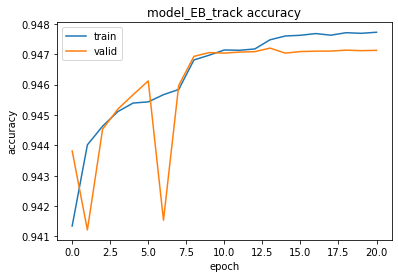

In [38]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_EB_track accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

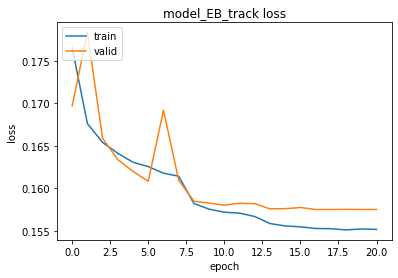

In [39]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_EB_track loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

In [40]:
y_track_pred=model_EB_track.predict(X_track_test)

In [41]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_track_pred.round())

array([[165612,  12696],
       [  7015, 185639]])

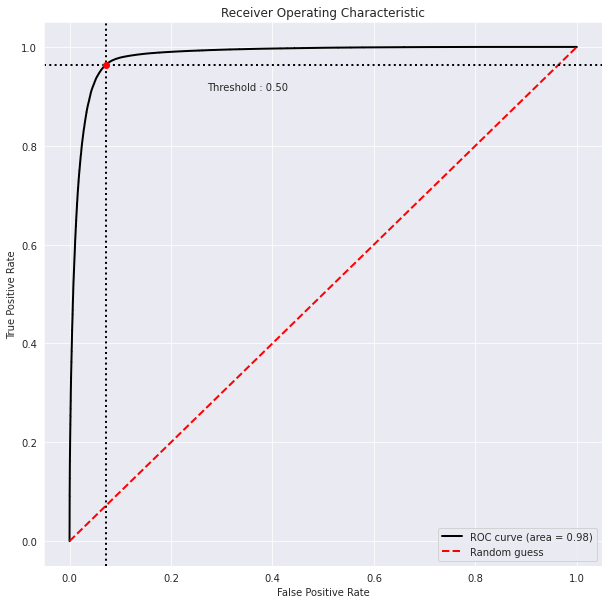

In [42]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

from plot_metric.functions import BinaryClassification


# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_track_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()

## Removing tracking information from input data

In [43]:
X_notrack_train_val = X_track_train_val[:,0:13]
X_notrack_test = X_track_test[:,0:13]

# NN Model without tracker information for EB region

####  We are only training with 13 parameter for this model

In [44]:
keras.backend.clear_session()
model_EB_notrack = Sequential()
model_EB_notrack.add(Dense(300, input_dim=13, activation='relu'))
model_EB_notrack.add(Dropout(.05))
model_EB_notrack.add(Dense(250, activation='relu'))
model_EB_notrack.add(Dropout(.05))
model_EB_notrack.add(Dense(200, activation='relu'))
model_EB_notrack.add(Dropout(.05))
model_EB_notrack.add(Dense(150, activation='relu'))
model_EB_notrack.add(Dropout(.05))
model_EB_notrack.add(Dense(100, activation='relu'))
model_EB_notrack.add(Dropout(.025))
model_EB_notrack.add(Dense(70, activation='relu'))
model_EB_notrack.add(Dropout(.01))
model_EB_notrack.add(Dense(50, activation='relu'))
model_EB_notrack.add(Dense(25, activation='relu'))
model_EB_notrack.add(Dense(1, activation='sigmoid'))

# compile the model
model_EB_notrack.compile(optimizer='nadam', loss='binary_crossentropy', metrics=['accuracy'])
# print the model summary
model_EB_notrack.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               4200      
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               75250     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 200)               50200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 150)               3

In [45]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_delta=0.0001, min_lr=1e-10, mode='auto')
checkpoint_cb = keras.callbacks.ModelCheckpoint("model_EB_notrack.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=4, restore_best_weights = True)
history=model_EB_notrack.fit(X_notrack_train_val, Y_train_val,\
        batch_size=256,\
        epochs=50,\
        validation_split=.20,\
        callbacks=[reduce_lr, checkpoint_cb, early_stopping_cb],\
        verbose=1, shuffle=True, initial_epoch=0
        )


Epoch 1/50
4638/4638 [==============================] - 36s 7ms/step - loss: 0.5141 - accuracy: 0.7435 - val_loss: 0.5082 - val_accuracy: 0.7485
Epoch 2/50
4638/4638 [==============================] - 34s 7ms/step - loss: 0.4799 - accuracy: 0.7654 - val_loss: 0.4802 - val_accuracy: 0.7655
Epoch 3/50
4638/4638 [==============================] - 35s 7ms/step - loss: 0.4753 - accuracy: 0.7678 - val_loss: 0.5036 - val_accuracy: 0.7657
Epoch 4/50
4638/4638 [==============================] - 34s 7ms/step - loss: 0.4724 - accuracy: 0.7694 - val_loss: 0.4717 - val_accuracy: 0.7691
Epoch 5/50
4638/4638 [==============================] - 35s 7ms/step - loss: 0.4699 - accuracy: 0.7708 - val_loss: 0.4669 - val_accuracy: 0.7718
Epoch 6/50
4638/4638 [==============================] - 40s 9ms/step - loss: 0.4701 - accuracy: 0.7709 - val_loss: 0.4678 - val_accuracy: 0.7714
Epoch 7/50
4638/4638 [==============================] - 41s 9ms/step - loss: 0.4674 - accuracy: 0.7725 - val_loss: 0.4693 - val_ac

In [46]:
model_EB_notrack = keras.models.load_model("model_EB_notrack.h5")

In [47]:
model_EB_notrack.evaluate(X_notrack_test, Y_test)

11593/11593 [==============================] - 14s 1ms/step - loss: 0.4610 - accuracy: 0.7745


[0.4610247015953064, 0.7744593620300293]

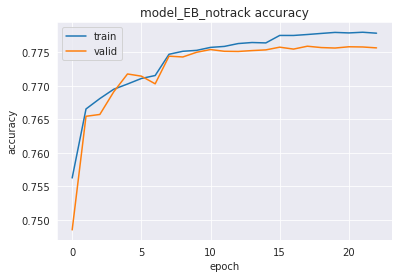

In [48]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_EB_notrack accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

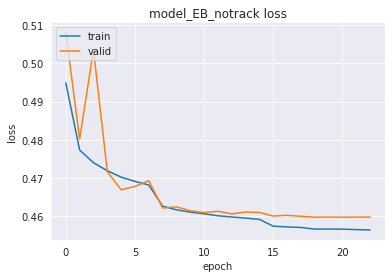

In [49]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model_EB_notrack loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')

plt.show()

In [50]:
y_notrack_pred=model_EB_notrack.predict(X_notrack_test)

In [51]:
confusion_matrix(Y_test, y_notrack_pred.round())

array([[128573,  49735],
       [ 33932, 158722]])

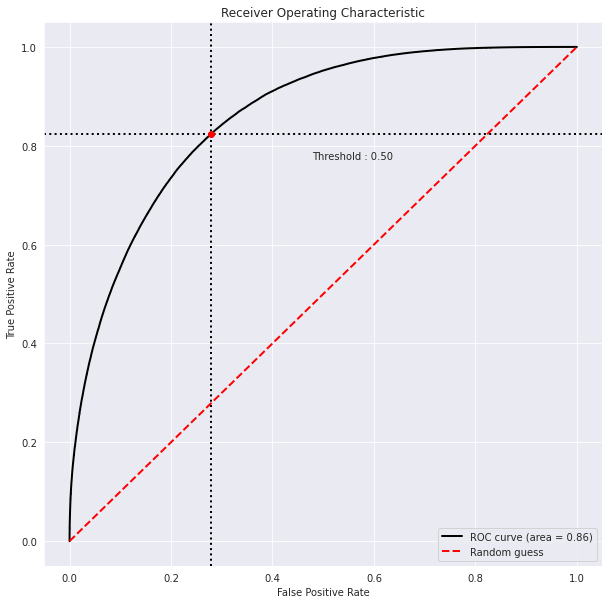

In [52]:
# Visualisation with plot_metric
bc = BinaryClassification(Y_test, y_notrack_pred, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(10,10))
bc.plot_roc_curve()
plt.show()